# Analyzing NuScenes Dataset

In [2]:
print("hello there")

hello there


In [3]:
# import OS module
import os
# Get the list of all files and directories
path = "D:\ARSALAN\datasets"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' D:\ARSALAN\datasets ' :
['data_odometry_gray', 'data_odometry_gray.zip', 'data_odometry_poses', 'data_odometry_poses.zip', 'kaggle_weapon', 'kaggle_weapon.zip', 'nuscenes', 'v1.0-mini.tgz']


In [4]:
# initializing the data set
%matplotlib inline
from nuscenes.nuscenes import NuScenes

In [5]:
# loading the dataset
nusc = NuScenes(version = 'v1.0-mini', dataroot = 'D:/ARSALAN/datasets/nuscenes', verbose = True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.501 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [6]:
#list the scenes
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [7]:
# a scenes metadata
my_scene = nusc.scene[5]
my_scene

{'token': 'c5224b9b454b4ded9b5d2d2634bbda8a',
 'log_token': '8ff48ad1df8e4966a2151730c92b7f3c',
 'nbr_samples': 40,
 'first_sample_token': 'c1676a2feac74eee8aa38ca3901787d6',
 'last_sample_token': '63c24b51feb94f14bec29022dae4975d',
 'name': 'scene-0796',
 'description': 'Scooter, peds on sidewalk, bus, cars, truck, fake construction worker, bicycle, cross intersection, car overtaking us'}

In [8]:
#examin the meta data of the first sample token
my_sample = nusc.get('sample', my_scene['first_sample_token'])
my_sample

{'token': 'c1676a2feac74eee8aa38ca3901787d6',
 'timestamp': 1538448744447639,
 'prev': '',
 'next': 'd6b0de49811b4d1b86a0933719c0c44a',
 'scene_token': 'c5224b9b454b4ded9b5d2d2634bbda8a',
 'data': {'RADAR_FRONT': '26d0c02b681f48bba9d4bde8fc68a9c7',
  'RADAR_FRONT_LEFT': '496dc8b327814f7ba48a74972bde1433',
  'RADAR_FRONT_RIGHT': 'f4b5941dcfa3400ea0a24f5fbe90cef5',
  'RADAR_BACK_LEFT': '1268ee4a07cf44c099017710c624ba7b',
  'RADAR_BACK_RIGHT': '9877d1dbb6624f1393962060f39c5452',
  'LIDAR_TOP': '17dcee974ba349e884f676670d0c66e7',
  'CAM_FRONT': '98bea7c1f83340119051b7b7a0185033',
  'CAM_FRONT_RIGHT': '28cbeca98a834194a4dc71c616a429ce',
  'CAM_BACK_RIGHT': '4118dd0fa03f451c99a09ee72a0d6fbb',
  'CAM_BACK_LEFT': '9706ab2aaf304042bfb731ebf33b35d8',
  'CAM_BACK': 'be22879d93f04150bb9466211012205e',
  'CAM_FRONT_LEFT': '272da8148606496f92712408680498c4'},
 'anns': ['3f295dcfa09a491ca53efbb2f048b963',
  '44928e4ac6134cacbf7c63429d38d021',
  'a89b46240ab7452cb990cc034efffd8c',
  'f2b2109b8c754caa8

In [9]:
# list all the related sample data in the token
nusc.list_sample(my_sample['token'])

Sample: c1676a2feac74eee8aa38ca3901787d6

sample_data_token: 26d0c02b681f48bba9d4bde8fc68a9c7, mod: radar, channel: RADAR_FRONT
sample_data_token: 496dc8b327814f7ba48a74972bde1433, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: f4b5941dcfa3400ea0a24f5fbe90cef5, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 1268ee4a07cf44c099017710c624ba7b, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 9877d1dbb6624f1393962060f39c5452, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 17dcee974ba349e884f676670d0c66e7, mod: lidar, channel: LIDAR_TOP
sample_data_token: 98bea7c1f83340119051b7b7a0185033, mod: camera, channel: CAM_FRONT
sample_data_token: 28cbeca98a834194a4dc71c616a429ce, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 4118dd0fa03f451c99a09ee72a0d6fbb, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 9706ab2aaf304042bfb731ebf33b35d8, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: be22879d93f04150bb9466211012205e, mod: camera, cha

In [10]:
# provide the key access
my_sample['data']

{'RADAR_FRONT': '26d0c02b681f48bba9d4bde8fc68a9c7',
 'RADAR_FRONT_LEFT': '496dc8b327814f7ba48a74972bde1433',
 'RADAR_FRONT_RIGHT': 'f4b5941dcfa3400ea0a24f5fbe90cef5',
 'RADAR_BACK_LEFT': '1268ee4a07cf44c099017710c624ba7b',
 'RADAR_BACK_RIGHT': '9877d1dbb6624f1393962060f39c5452',
 'LIDAR_TOP': '17dcee974ba349e884f676670d0c66e7',
 'CAM_FRONT': '98bea7c1f83340119051b7b7a0185033',
 'CAM_FRONT_RIGHT': '28cbeca98a834194a4dc71c616a429ce',
 'CAM_BACK_RIGHT': '4118dd0fa03f451c99a09ee72a0d6fbb',
 'CAM_BACK_LEFT': '9706ab2aaf304042bfb731ebf33b35d8',
 'CAM_BACK': 'be22879d93f04150bb9466211012205e',
 'CAM_FRONT_LEFT': '272da8148606496f92712408680498c4'}

In [11]:
#lets look at sensor data of the front camera
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': '98bea7c1f83340119051b7b7a0185033',
 'sample_token': 'c1676a2feac74eee8aa38ca3901787d6',
 'ego_pose_token': '98bea7c1f83340119051b7b7a0185033',
 'calibrated_sensor_token': '1e2441fdd3bd41f2badbeb0a1775d1e6',
 'timestamp': 1538448744412460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-10-02-10-50-40+0800__CAM_FRONT__1538448744412460.jpg',
 'prev': '',
 'next': '98f86e7371c241c0838522e4c9c06e4c',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

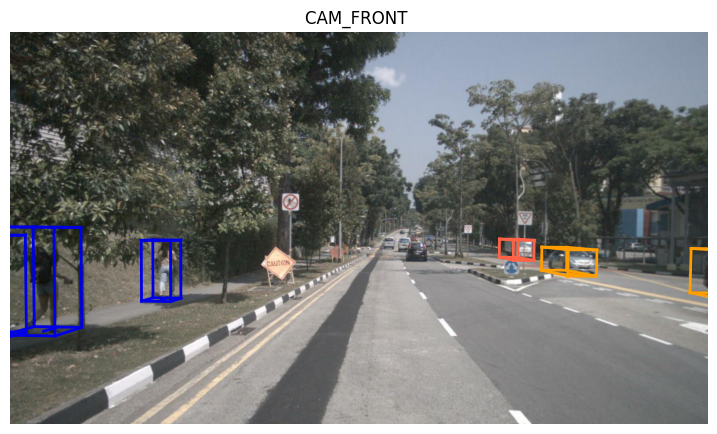

In [12]:
#render the sample data of this sensor
nusc.render_sample_data(cam_front_data['token'])

In [13]:
my_annotation_token = my_sample['anns'][10]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

{'token': '77afa772cb4a4e5c8a5a53f2019bdba0',
 'sample_token': 'c1676a2feac74eee8aa38ca3901787d6',
 'instance_token': '9cba9cd8af85487fb010652c90d845b5',
 'visibility_token': '4',
 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
 'translation': [1873.399, 2506.519, 1.517],
 'size': [2.846, 12.9, 4.581],
 'rotation': [0.9273080278321599, 0.0, 0.0, -0.37429910702275265],
 'prev': '',
 'next': '6efa8fae3ca04c58a5f40e78c3a0d912',
 'num_lidar_pts': 428,
 'num_radar_pts': 7,
 'category_name': 'vehicle.bus.rigid'}

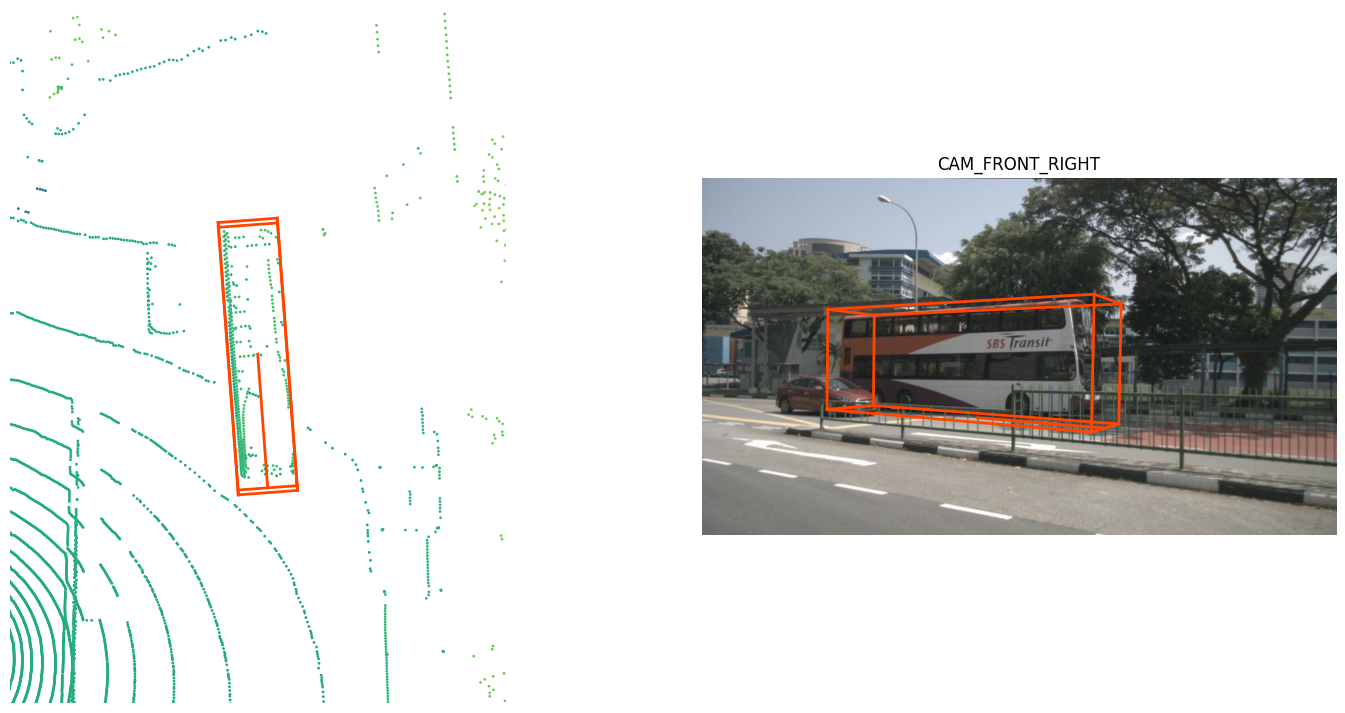

In [14]:
#render lidar data
nusc.render_annotation(my_annotation_token)